<a href="https://colab.research.google.com/github/HH197/GLM-project/blob/main/hist_gradient_non_para.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install adjustText
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab 
from datetime import datetime
import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon
from shapely import wkt
from adjustText import adjust_text
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab 
from datetime import datetime
import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon
from shapely import wkt
from adjustText import adjust_text
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

     |████████████████████████████████| 1.0 MB 10.1 MB/s 
     |████████████████████████████████| 6.3 MB 21.5 MB/s 
     |████████████████████████████████| 16.7 MB 138 kB/s 
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=42dddc0770ab6f66d08f894cca7aa8e29eca97f09b290c3e810b7c0288285201
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
! gdown --id 1LlwfCcagXrbz-X3rxaS-dbS75vr11wwG

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1LlwfCcagXrbz-X3rxaS-dbS75vr11wwG
To: /content/ookla-canada-speed-tiles-tansferred-subdivision-name-with-dummy.csv
100% 920M/920M [00:06<00:00, 146MB/s]


In [10]:
data= pd.read_csv('/content/ookla-canada-speed-tiles-tansferred-subdivision-name-with-dummy.csv')

In [11]:
data.head()

,Unnamed: 0,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,conn_type,...,DA_POP,PCUID,PCNAME,PCTYPE,PCCLASS,geometry,time,census_subdivision,District,Underserved
0,0,23331133131332,11910,1408,27,1,1,2019,Q1,fixed,...,590.0,NaN,NaN,NaN,NaN,"POLYGON ((4593360.869162522 4089469.903958718,...",1,HAM,1,False
1,1,23331133133011,14969,1554,25,1,1,2019,Q1,fixed,...,590.0,NaN,NaN,NaN,NaN,"POLYGON ((4592705.709263269 4089714.237789153,...",1,HAM,1,False
2,2,32202103303220,5038,1317,54,1,1,2019,Q1,fixed,...,330.0,NaN,NaN,NaN,NaN,"POLYGON ((4736491.486114961 4146142.702105635,...",1,HAM,1,True
3,3,32220031120102,13419,6169,50,4,1,2019,Q1,fixed,...,275.0,NaN,NaN,NaN,NaN,"POLYGON ((4642710.684221942 4070147.11608694, ...",1,HAM,1,True
4,4,32220031120103,13587,1095,28,2,1,2019,Q1,fixed,...,275.0,388.0,Inuvik,4.0,2.0,"POLYGON ((4642884.53847014 4070012.63271272, 4...",1,HAM,0,False


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751464 entries, 0 to 2751463
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   quadkey             int64  
 2   avg_d_kbps          int64  
 3   avg_u_kbps          int64  
 4   avg_lat_ms          int64  
 5   tests               int64  
 6   devices             int64  
 7   year                int64  
 8   quarter             object 
 9   conn_type           object 
 10  PRUID               int64  
 11  PRNAME              object 
 12  CDUID               int64  
 13  CDNAME              object 
 14  DAUID               int64  
 15  SACTYPE             int64  
 16  DA_POP              float64
 17  PCUID               float64
 18  PCNAME              object 
 19  PCTYPE              float64
 20  PCCLASS             float64
 21  geometry            object 
 22  time                int64  
 23  census_subdivision  object 
 24  District            int6

In [13]:
data['conn_type']=data['conn_type'].astype('category')
data['PRNAME']=data['PRNAME'].astype('category')
#data['CDNAME']=data['CDNAME'].astype('category')
#data['PCNAME']=data['PCNAME'].astype('category')
data['SACTYPE']=data['SACTYPE'].astype('category')
data['census_subdivision']=data['census_subdivision'].astype('category')
data['District']=data['District'].astype('category')
data['Underserved']=data['Underserved'].astype('category')

In [14]:
data['time']=data['time'].astype('float')
data['tests']=data['tests'].astype('float')
data['devices']=data['devices'].astype('float')
data['DA_POP']=data['DA_POP'].astype('float')

In [15]:
cat_col=['conn_type','PRNAME','SACTYPE','census_subdivision','District','Underserved']
num_col=['time','tests','devices','DA_POP']

In [16]:
X=data[cat_col+num_col]

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751464 entries, 0 to 2751463
Data columns (total 10 columns):
 #   Column              Dtype   
---  ------              -----   
 0   conn_type           category
 1   PRNAME              category
 2   SACTYPE             category
 3   census_subdivision  category
 4   District            category
 5   Underserved         category
 6   time                float64 
 7   tests               float64 
 8   devices             float64 
 9   DA_POP              float64 
dtypes: category(6), float64(4)
memory usage: 99.7 MB


In [18]:
X.head()

,conn_type,PRNAME,SACTYPE,census_subdivision,District,Underserved,time,tests,devices,DA_POP
0,fixed,Northwest Territories / Territoires du Nord-Ouest,8,HAM,1,False,1.0,1.0,1.0,590.0
1,fixed,Northwest Territories / Territoires du Nord-Ouest,8,HAM,1,False,1.0,1.0,1.0,590.0
2,fixed,Northwest Territories / Territoires du Nord-Ouest,8,HAM,1,True,1.0,1.0,1.0,330.0
3,fixed,Northwest Territories / Territoires du Nord-Ouest,8,HAM,1,True,1.0,4.0,1.0,275.0
4,fixed,Northwest Territories / Territoires du Nord-Ouest,8,HAM,0,False,1.0,2.0,1.0,275.0


In [19]:
y1=data['avg_d_kbps']
y2=data['avg_u_kbps']
y3=data['avg_lat_ms']

In [20]:
n_categorical_features = X.select_dtypes(include="category").shape[1]
n_numerical_features = X.select_dtypes(include="number").shape[1]


In [21]:
n_categorical_features

6

In [22]:
n_numerical_features

4

In [33]:
test_ind=[i for i,v in enumerate(X['time']) if v > 8]


In [48]:
X_test=X.loc[test_ind,]
train_ind=np.arange(0,test_ind[0])
train_ind2=train_ind.tolist()
X_train=X.loc[train_ind,]

In [50]:
y1_train=y1[train_ind2]
y2_train=y2[train_ind2]
y3_train=y3[train_ind2]
y1_test=y1[test_ind]
y2_test=y2[test_ind]
y3_test=y3[test_ind]

In [24]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [25]:
# The ordinal encoder will first output the categorical features, and then the
# continuous (passed-through) features

from sklearn.preprocessing import OrdinalEncoder
import numpy as np

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)



In [26]:
# The ordinal encoder will first output the categorical features, and then the
# continuous (passed-through) features

categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features
hist_native = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42, categorical_features=categorical_mask
    ),
)

Predicting Average Download Speed

In [57]:
train1=hist_native.fit(X_train,y1_train)


$R^2 \text{value}$ 

In [59]:
from sklearn.metrics import r2_score
predictions1 = train1.predict(X_test)
print (r2_score(y1_test, predictions1))

0.226983992825332


Root MSE in KB

In [60]:
from sklearn.metrics import mean_squared_error
np.divide(np.sqrt(mean_squared_error(predictions1, y1_test)),1000)

91.3097122574823

Predicting Average Upload Speed

$R^2 \text{value}$ 

In [61]:
train2=hist_native.fit(X_train,y2_train)
predictions2 = train2.predict(X_test)
print (r2_score(y2_test, predictions2))


0.18925322687483215


Root MSE in KB

In [62]:
np.divide(np.sqrt(mean_squared_error(predictions2, y2_test)),1000)

50.48188537547831

Predicting Average Latency

$R^2 \text{value}$ 

In [63]:
train3=hist_native.fit(X_train,y3_train)
predictions3 = train3.predict(X_test)
print (r2_score(y3_test, predictions3))


0.17812443572882342


Root MSE in KB

In [64]:
np.divide(np.sqrt(mean_squared_error(predictions3, y3_test)),1000)

0.0870794056178683

Non-Parametric Tests

Mann Whitney U Test (Wilcoxon Rank Sum Test)

$H_0:$ Urban and Rural download speed come from same distribution

$H_a:$ Urban and Rural download speed come from different distributions.

In [68]:
rural_ind=[i for i,v in enumerate(X['District']) if i >0]

In [82]:
rural_dat=data[data.District =='1']

In [87]:
len(rural_dat.index)

1498904

In [97]:
data2= pd.read_csv('/content/ookla-canada-speed-tiles-tansferred-subdivision-name-with-dummy.csv')

In [123]:
test=data2.groupby(['quadkey','District'])['avg_d_kbps'].mean().reset_index()

In [124]:
test.head()

,quadkey,District,avg_d_kbps
0,23331133131232,1,1859.000000
1,23331133131233,1,16844.250000
2,23331133131301,1,903.500000
3,23331133131303,1,25067.000000
4,23331133131323,1,15006.333333


In [126]:
urban=test[test.District ==0]
rural=test[test.District ==1]

In [127]:
u_down=urban['avg_d_kbps']
r_down=rural['avg_d_kbps']

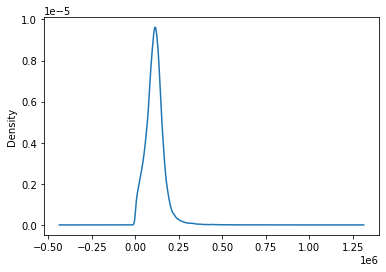

In [128]:
u_down.plot.kde()

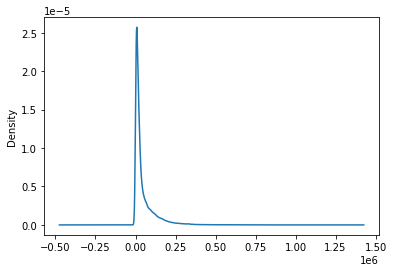

In [129]:
r_down.plot.kde()

In [130]:
from scipy.stats import mannwhitneyu
u_down_l=u_down.tolist()
r_down_l=r_down.tolist()

In [131]:
mannwhitneyu(u_down_l, r_down_l)

MannwhitneyuResult(statistic=7242777973.5, pvalue=0.0)

In [132]:
test2=data2.groupby(['quadkey','District','Underserved'])['avg_d_kbps'].mean().reset_index()

In [133]:
test2.head()

,quadkey,District,Underserved,avg_d_kbps
0,23331133131232,1,True,1859.000000
1,23331133131233,1,False,18056.666667
2,23331133131233,1,True,13207.000000
3,23331133131301,1,True,903.500000
4,23331133131303,1,False,25067.000000


In [135]:
test2['Underserved'][0]==True

True

In [137]:
len(X)-len(test2)

2043709

Kruskel_Wallis H-Test(Non-Parametric Anova)

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. 

In [143]:
def anova_list(dat):
  result=[0]*len(dat)
  for i in range(0,len(dat)):
    if dat['District'][i]==1:
      if dat['Underserved'][i]==True:
        result[i]="ru"
      else:
        result[i]="rs"
    else:
      if dat['Underserved'][i]==True:
        result[i]="uu"
      else:
        result[i]="us"
  return(result)  


In [144]:
al=anova_list(test2)

In [145]:
test2['DU']=al

In [146]:
test2.head()

,quadkey,District,Underserved,avg_d_kbps,DU
0,23331133131232,1,True,1859.000000,ru
1,23331133131233,1,False,18056.666667,rs
2,23331133131233,1,True,13207.000000,ru
3,23331133131301,1,True,903.500000,ru
4,23331133131303,1,False,25067.000000,rs


In [170]:
ru=[]
rs=[]
uu=[]
us=[]

In [171]:
for i in range(0, len(test2)):
  if test2['DU'][i]=='ru':
    ru.append(test2['avg_d_kbps'][i])
  elif test2['DU'][i]=='rs':
    rs.append(test2['avg_d_kbps'][i])
  elif test2['DU'][i]=='uu':
    uu.append(test2['avg_d_kbps'][i])
  else:
    us.append(test2['avg_d_kbps'][i])

In [173]:
from scipy import stats
stats.kruskal(ru,rs,uu,us)

KruskalResult(statistic=381655.69135850505, pvalue=0.0)

P-value small, reject null, population median(median of mean of avg_d_kbps) is different for one or more groups

Dunn's Test (Non-Parametric Tukey HSD Test)

$H_0:$ There is no difference between groups (groups can be equal or unequal in size).

$H_a:$ There is a difference between groups.

In [174]:
x=[ru,rs,uu,us]

In [175]:
#!pip install scikit_posthocs
import scikit_posthocs as sp

In [178]:
sp.posthoc_dunn(x,p_adjust = 'holm-sidak')

,1,2,3,4
1,1.00000,0.0,0.00123,0.0
2,0.00000,1.0,0.00000,0.0
3,0.00123,0.0,1.00000,0.0
4,0.00000,0.0,0.00000,1.0


P-value small for all groups. Reject null hypothesis. There is a difference between all group pairs.